In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Set working directory (update to your path)
os.chdir(r"C:\Users\vikic\Desktop\ME3+\Python\LCA")


In [ ]:
data = pd.read_excel("LCA.xlsx")
print(data.head())

In [19]:
data["Emissions"]= data["Quantity"]*data["Emission Factor "]
data["Emissions_ton"]= (data["Quantity"]*data["Emission Factor "])/1000
total_emissions = data["Emissions"].sum() #by KG
total_emissions_ton = data["Emissions_ton"].sum() #by tons

print(data.to_string(index=False, header=True, line_width=1000))
print(f"Total Emissions: {total_emissions} kg CO2e")
print(f"Total Emissions: {total_emissions_ton} ton CO2e")

         Stage                        Activity  Quantity   Unit  Emission Factor   Emissions  Emissions_ton
 Raw Materials          Polysilicon Production       750     kg             55.00    41250.0        41.2500
 Raw Materials                Glass Production      1500     kg              1.10     1650.0         1.6500
 Raw Materials                 Aluminum Frames       300     kg              8.20     2460.0         2.4600
 Raw Materials     Copper (wiring, connectors)        50     kg              3.50      175.0         0.1750
 Manufacturing         PV Module Manufacturing        50  panel            350.00    17500.0        17.5000
 Manufacturing          Inverter Manufacturing         2   unit            800.00     1600.0         1.6000
Transportation Panels Transport (Local France)      1200 ton.km              0.10      120.0         0.1200
Transportation             Inverters Transport      1200 ton.km              0.10      120.0         0.1200
  Installation             M

In [18]:
stage_emissions = data.groupby('Stage')['Emissions_ton'].sum().reset_index()
top_activities= data.sort_values('Emissions_ton', ascending= False).head(5)
print("Emissions by Stage:")
print(stage_emissions)
print("\nTop 5 Activities Contributing to Emissions:")
print(top_activities.to_string(header=True, index= False, line_width= 500))

Emissions by Stage:
            Stage  Emissions_ton
0     End-of-Life        -4.0000
1    Installation         2.6600
2   Manufacturing        19.1000
3       Operation         0.0255
4   Raw Materials        45.5350
5  Transportation         0.2400

Top 5 Activities Contributing to Emissions:
        Stage                Activity  Quantity  Unit  Emission Factor   Emissions  Emissions_ton
Raw Materials  Polysilicon Production       750    kg              55.0    41250.0          41.25
Manufacturing PV Module Manufacturing        50 panel             350.0    17500.0          17.50
 Installation     Mounting Structures      1000    kg               2.5     2500.0           2.50
Raw Materials         Aluminum Frames       300    kg               8.2     2460.0           2.46
Raw Materials        Glass Production      1500    kg               1.1     1650.0           1.65


In [17]:
negative_emissions = data[data['Emissions_ton'] < 0]
total_carbon_saved = negative_emissions['Emissions_ton'].abs().sum()
print(f"Total carbon saved: {total_carbon_saved} ton CO2")

# List the stages where carbon savings occurred
print("\nStages with carbon savings:")
for index, row in negative_emissions.iterrows():
    print(f"Stage: {row['Stage']}, Carbon Saved: {abs(row['Emissions_ton'])} ton CO2")

Total carbon saved: 4.0 ton CO2

Stages with carbon savings:
Stage: End-of-Life, Carbon Saved: 2.5 ton CO2
Stage: End-of-Life, Carbon Saved: 1.5 ton CO2


In [16]:
Carbon_Price = 63 #euro/ton
Carbon_Price= Carbon_Price/1000  #euro/kg

Total_Carbon_Price = Carbon_Price*total_emissions
print(f"The total amount of carbon: {Total_Carbon_Price} €")

The total amount of carbon: 4004.3115000000003 €


C:\Users\vikic\AppData\Local\Temp\ipykernel_25596\3835423880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Emissions_ton', data=stage_emissions, palette="viridis")


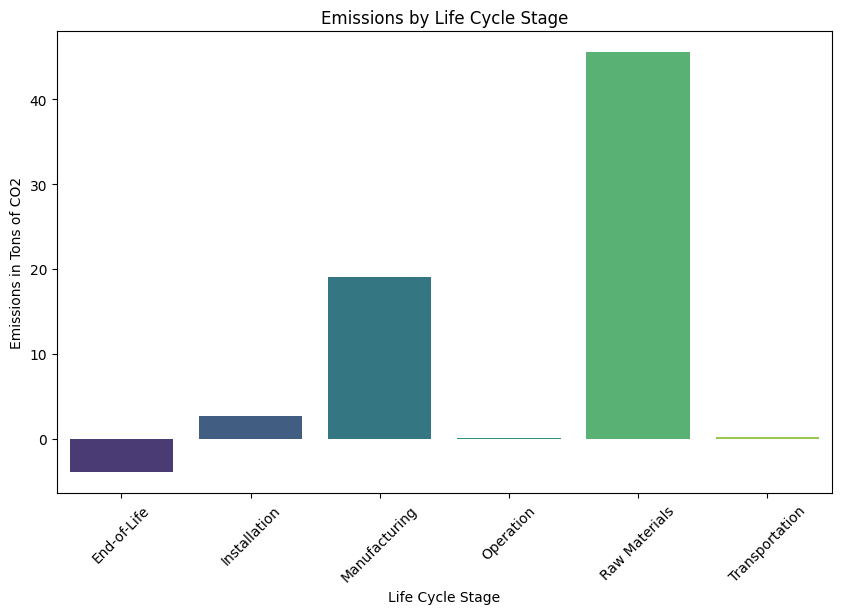

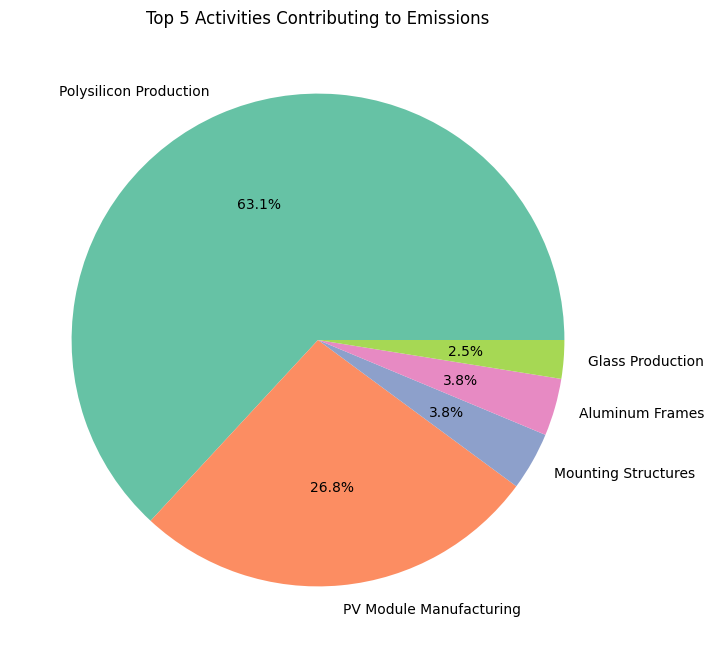

In [47]:
# Bar plot for emissions by stage
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Emissions_ton', data=stage_emissions, palette="viridis")
plt.title('Emissions by Life Cycle Stage')
plt.xlabel('Life Cycle Stage')
plt.ylabel('Emissions in Tons of CO2')
plt.xticks(rotation=45)
plt.show()

# Pie chart for top 5 activities
plt.figure(figsize=(8, 8))
top_activities.set_index('Activity')['Emissions_ton'].plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Top 5 Activities Contributing to Emissions')
plt.ylabel('')
plt.show()


In [15]:
# %% Saving the updated Data to Excel
output_path = "Updated_LCA.xlsx"  # Define your output file name
data.to_excel(output_path, index=False)

print(f"Updated data has been saved to {output_path}")


Updated data has been saved to Updated_LCA.xlsx
